In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

#drop duplicates
city_df = city_df.drop_duplicates('city', keep = 'first')

# Combine the data into a single dataset
combined_df = pd.merge(ride_df, city_df, how='left', on='city')

# Display the data table for preview
combined_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

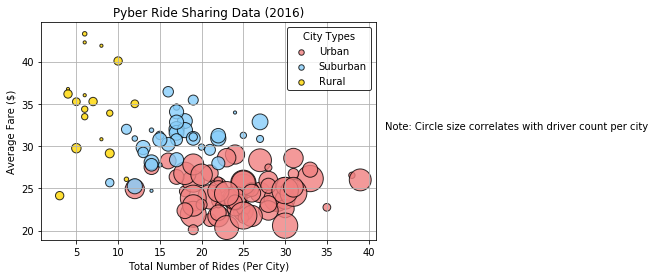

In [2]:
# Obtain the x and y coordinates for each of the three city types
#Group by city
group_df = combined_df.groupby('city')

#extract variables for new df
avg_fare = group_df['fare'].mean()
count_ride = group_df['ride_id'].count()
count_driver = group_df['driver_count'].mean()
city_type = city_df.set_index('city')['type']

#new df using extracted variables
new_df = pd.DataFrame({
    'Number of Rides': count_ride,
    'Average Fare': avg_fare,
    'Number of Drivers': count_driver,
    'City Type': city_type
})

#dataframe by type
urb_df = new_df[new_df['City Type'] == 'Urban']
sub_df = new_df[new_df['City Type'] == 'Suburban']
rur_df = new_df[new_df['City Type'] == 'Rural']

#Colors
color_scheme = {'Light Coral':'#F08080', 'Light Sky Blue':'#87CEFA', 'Gold':'#FFD700'}
colors = {'Urban': color_scheme['Light Coral'], 'Suburban': color_scheme['Light Sky Blue'], 'Rural': color_scheme['Gold']}

# Build the scatter plots for each city types
plt.scatter(urb_df['Number of Rides'], urb_df['Average Fare'], edgecolor = 'black', color = colors['Urban'], s = urb_df['Number of Drivers']*10, label = 'Urban', alpha = .8)
plt.scatter(sub_df['Number of Rides'], sub_df['Average Fare'], edgecolor = 'black', color = colors['Suburban'], s = sub_df['Number of Drivers']*10, label = 'Suburban', alpha = .8)
plt.scatter(rur_df['Number of Rides'], rur_df['Average Fare'], edgecolor = 'black', color = colors['Rural'], s = rur_df['Number of Drivers']*10, label = 'Rural', alpha = .8)

# Incorporate the other graph properties
plt.title('Pyber Ride Sharing Data (2016)')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.grid(b=bool, which='both', axis='both')

# Create a legend
legend = plt.legend(frameon = True, title = 'City Types', edgecolor = 'black')
legend.legendHandles[0]._sizes = [30]
legend.legendHandles[1]._sizes = [30]
legend.legendHandles[2]._sizes = [30]

# Incorporate a text label regarding circle size
plt.text(42, 32, 'Note: Circle size correlates with driver count per city')

# Save Figure
plt.savefig("Bubble_Plot.png")


In [3]:
# Show plot
plt.show()

## Total Fares by City Type

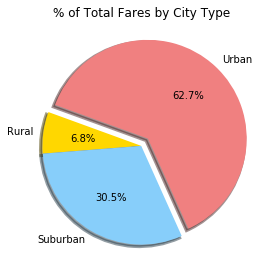

In [4]:
# Calculate Type Percents
type_df = combined_df.groupby('type')

#find the total fare
total_fare = type_df['fare'].sum()

# Build Pie Chart
labels = total_fare.index
colors = [colors[n] for n in labels]
explode = [0, 0, .1]
plt.pie(total_fare, wedgeprops = {'linewidth': 3}, labels = labels, colors = colors, explode = explode, shadow = True, startangle = 160, autopct = '%1.1f%%')
plt.title('% of Total Fares by City Type')
plt.tight_layout()

# Save Figure
plt.savefig("Total_fare_by_city.png")


In [5]:
# Show Figure
plt.show()

## Total Rides by City Type

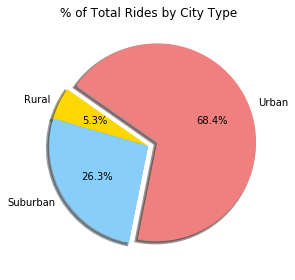

<Figure size 432x288 with 0 Axes>

In [6]:
# Calculate Ride Percents
percent_ride = type_df['ride_id'].count()

# Build Pie Chart
labels = percent_ride.index
plt.pie(percent_ride, wedgeprops = {'linewidth': 3}, labels = labels, colors = colors, explode = explode, shadow = True, startangle = 145, autopct = '%1.1f%%' )
plt.title('% of Total Rides by City Type')
plt.tight_layout()
plt.show()

# Save Figure
plt.savefig("Total_rides_by_city.png")

In [7]:
# Show Figure
plt.show()

## Total Drivers by City Type

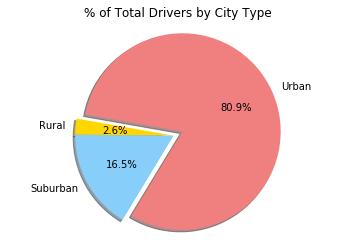

<Figure size 432x288 with 0 Axes>

In [8]:
# Calculate Driver Percents
percent_drive = city_df.groupby('type').sum()['driver_count']

# Build Pie Charts
labels = percent_drive.index
plt.pie(percent_drive, labels = labels, colors = colors, explode = explode, shadow = True, startangle = 170, autopct = '%1.1f%%' )
plt.title('% of Total Drivers by City Type')
plt.axis('equal')
plt.show()

# Save Figure
plt.savefig("Total_drivers_by_city.png")

In [9]:
# Show Figure
plt.show()